# DataSet

In [18]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

data_13 = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_13.csv')

In [19]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

data = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_12.csv')
len(data.query("is_test == 1"))

9272

In [20]:
import pandas as pd

outlier_data = data_13[['is_outlier', 'percentage_difference']]

test_cnt = len(data.query("is_test == 1"))
test_outlier_data =pd.DataFrame({"is_outlier" : [False] * test_cnt, "percentage_difference" : [0] * test_cnt})

outlier_data = pd.concat([outlier_data, test_outlier_data])
outlier_data

,is_outlier,percentage_difference
0,True,-15.906998
1,False,2.392918
2,False,-1.123046
3,False,-5.709482
4,False,14.318237
...,...,...
9267,False,0.000000
9268,False,0.000000
9269,False,0.000000
9270,False,0.000000


In [21]:
temp_index = list(range(len(data)))
data['id'] = temp_index
selected_columns = ['id', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '구', '동', '건축년도', '주차대수', '강남여부',
                    'closest_bus_stop_distance','closest_subway_station_distance', 'bus_stop_count_500m',
                    'subway_station_count_500m', 'bus_stop_count_750m',
                    'subway_station_count_750m', 'bus_stop_count_1000m',
                    'subway_station_count_1000m', 'distance_to_lead_house', 'is_test', 'target',]

df = data[selected_columns]

df['전용면적'] = df['전용면적(㎡)']
df.drop(columns=['전용면적(㎡)'], axis=1, inplace=True)

df['계약년'] = df['계약년월'].map(lambda x : int(str(x)[:4]))

outlier_data = outlier_data.reset_index(drop=True)
df['is_outlier'] = outlier_data['is_outlier']
df['percentage_difference'] = outlier_data['percentage_difference']


# Outlier 제거

In [23]:
df = df.loc[(df['is_outlier'] == False) & 
(df['percentage_difference'] > -25) & 
(df['percentage_difference'] < 40), :]

# 로그변환

In [24]:
import numpy as np
df['target'] = np.log(df['target'])

# 지역별 chunk 나누기

In [25]:
chunks = {}

regions = df['구'].unique()

for region in regions:
    chunk = df[df['구'] == region]
    chunk.sort_values(by='계약년월')
    chunks[region] = chunk

# 강남구 vs 금천구

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

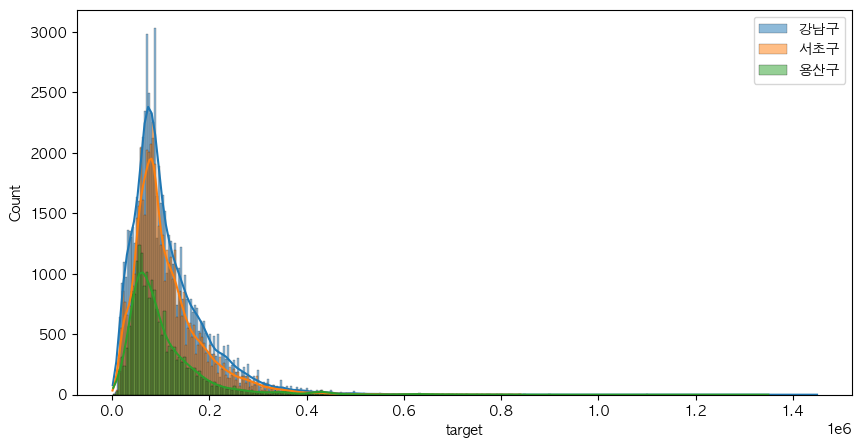

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

worst_chunk1 = chunks['강남구']
worst_chunk2 = chunks['서초구']
worst_chunk3 = chunks['용산구']

plt.figure(figsize=(10, 5))
sns.histplot(data = worst_chunk1, x = 'target', kde = True, label='강남구')
sns.histplot(data = worst_chunk2, x = 'target', kde = True, label='서초구')
sns.histplot(data = worst_chunk3, x = 'target', kde = True, label='용산구')

plt.legend()
plt.show()

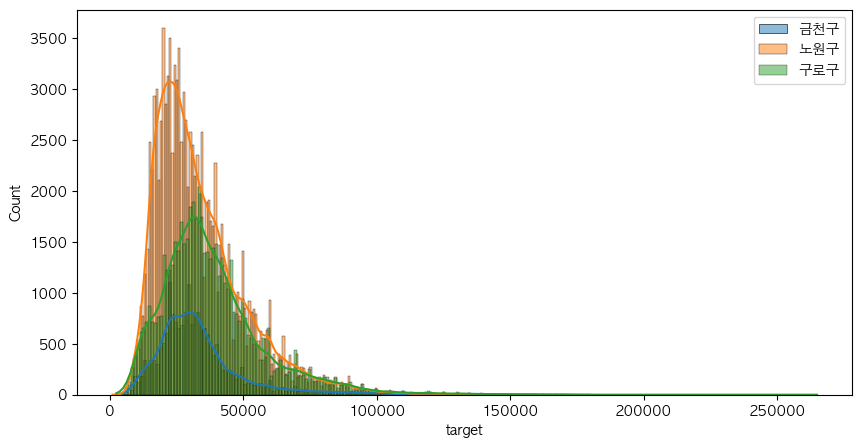

In [17]:
best_chunk1 = chunks['금천구']
best_chunk2 = chunks['노원구']
best_chunk3 = chunks['구로구']

plt.figure(figsize=(10, 5))
sns.histplot(data = best_chunk1, x = 'target', kde=True, label = '금천구')
sns.histplot(data = best_chunk2, x = 'target', kde=True, label = '노원구')
sns.histplot(data = best_chunk3, x = 'target', kde=True, label = '구로구')
plt.legend()
plt.show()